## 1. Libraries

Libraries required to run this notebook are imported below

In [20]:

from ucimlrepo import fetch_ucirepo 
import pandas as pd 
import numpy as np
import pandas as pd

import pickle

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import xgboost as xgb

import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

## 2. Load the data

The dataset used for this project was retrieved from UC Irvine Machine Learning Repository - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

The repository provides instructions and predifined functions for loading it's content into python. ucimlrepo python package needs to be imported (`pip install ucimlrepo`)

In [3]:
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
metadata = predict_students_dropout_and_academic_success.metadata
  
# variable information 
var_info = predict_students_dropout_and_academic_success.variables

df = predict_students_dropout_and_academic_success.data.original

**DataFrame columns**

In [4]:
df.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

**First five rows**

In [5]:
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Last five rows**

In [6]:
df.tail()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


## 3. Data preparation and data cleaning

**Dataset size**

The dataset contains 4424 rows (observations) and 37 columns (features)

In [7]:
df.shape

(4424, 37)

**Clean column headers**
* Get rid of blank spaces in column headers.

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

**Clean columns with string data type**
* Get's rid of blank spaces in string columns.

In [9]:
def clean_string_fields(df):
    strings = list(df.dtypes[df.dtypes == 'object'].index)
    for col in strings:
        df[col] = df[col].str.lower().str.replace(' ', '_')
    return df

In [10]:
df = clean_string_fields(df)

**Missing values**

In [11]:
df.isna().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
previous_qualification_(grade)                    0
nacionality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
admission_grade                                   0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrol

While the dataset appears to lack explicit missing values, the accompanying documentation highlights an important consideration. Specifically, within the 'mother's_occupation' and 'father's_occupation' fields, the presence of '99' in certain rows signifies missing values. These entries should be interpreted as blanks during the analysis. Subsequently, we will conduct an examination of these fields and handle the missing values accordingly.

* Row count where "mother's_occupation" is blank

In [12]:
len(df[df["mother's_occupation"]==99].index)

17

* Row count where "father's_occupation" is blank

In [13]:
len(df[df["father's_occupation"]==99].index)

19

In [14]:
observation_count = 4424
# Percentage of blanks
((17+19)/observation_count)*100

0.81374321880651

The unpopulated fields account for only 0.81% of the entire dataset. Consequently, removing these rows is unlikely to significantly impact our ability to train models using the resultant data.

In [15]:
df = df[(df["mother's_occupation"]!= 99) & (df["father's_occupation"]!= 99)]

In [16]:
df.shape

(4403, 37)

With the removal of rows containing blank values for 'mother's_occupation' and 'father's_occupation,' our dataset has no missing values. It is worth noting that the total number of observations has decreased from 4424 to 4403 following this data cleansing process.

**Data types**  
The dataset primarily consists of categorical features with numerical representations,  these numerical values correspond to specific strings, as detailed in the dataset description and accompanying documentation.  
It is important to correctly identify these fields as categorical (in accordance with the provided documentation) to ensure the appropriate handling of the data during the machine learning pipeline.

In [17]:
df.dtypes

marital_status                                      int64
application_mode                                    int64
application_order                                   int64
course                                              int64
daytime/evening_attendance                          int64
previous_qualification                              int64
previous_qualification_(grade)                    float64
nacionality                                         int64
mother's_qualification                              int64
father's_qualification                              int64
mother's_occupation                                 int64
father's_occupation                                 int64
admission_grade                                   float64
displaced                                           int64
educational_special_needs                           int64
debtor                                              int64
tuition_fees_up_to_date                             int64
gender        

Now we create a list `categorical_fields` which contains all categorical variables with numerical representations. Said list is then used to chage those fields to 'category' type

In [18]:
categorical_fields = ['marital_status', 'application_mode', 
                   'application_order', 'course',
                    'daytime/evening_attendance', 'previous_qualification',
                    'nacionality',
                    "mother's_qualification", "father's_qualification",
                    "mother's_occupation", "father's_occupation", 
                    'displaced', 'educational_special_needs', 'debtor',
                   'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
                    'international', 'target'
                   ]

In [21]:
for field in categorical_fields:
    df[field] = df[field].astype('category')

In [22]:
df.dtypes

marital_status                                    category
application_mode                                  category
application_order                                 category
course                                            category
daytime/evening_attendance                        category
previous_qualification                            category
previous_qualification_(grade)                     float64
nacionality                                       category
mother's_qualification                            category
father's_qualification                            category
mother's_occupation                               category
father's_occupation                               category
admission_grade                                    float64
displaced                                         category
educational_special_needs                         category
debtor                                            category
tuition_fees_up_to_date                           catego

**Split dataset for training, validation and test**

In [23]:
def split_dataset(data, seed):
    df_full_train, df_test = train_test_split(data, test_size=0.2, random_state = seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state = seed)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    return df_full_train, df_train, df_val, df_test

In [24]:
df_full_train, df_train, df_val, df_test = split_dataset(df, 1)

In [25]:
y_train = df_train.target
y_val = df_val.target
y_test = df_test.target

del df_train['target']
del df_val['target']
del df_test['target']

## 4. Exploratory Data Analysis (ETA) and feature importance analysis

ETA was performed on the training dataset

**Target Variable Distribution**


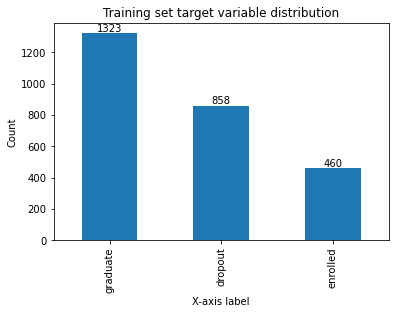

In [26]:
ax = y_train.value_counts().plot(kind = 'bar')

plt.title('Training set target variable distribution')
plt.xlabel('X-axis label')
plt.ylabel('Count')
for i, v in enumerate(y_train.value_counts()):
    ax.text(i, v , str(v), ha='center', va='bottom')
plt.show()

**Pairplot**
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

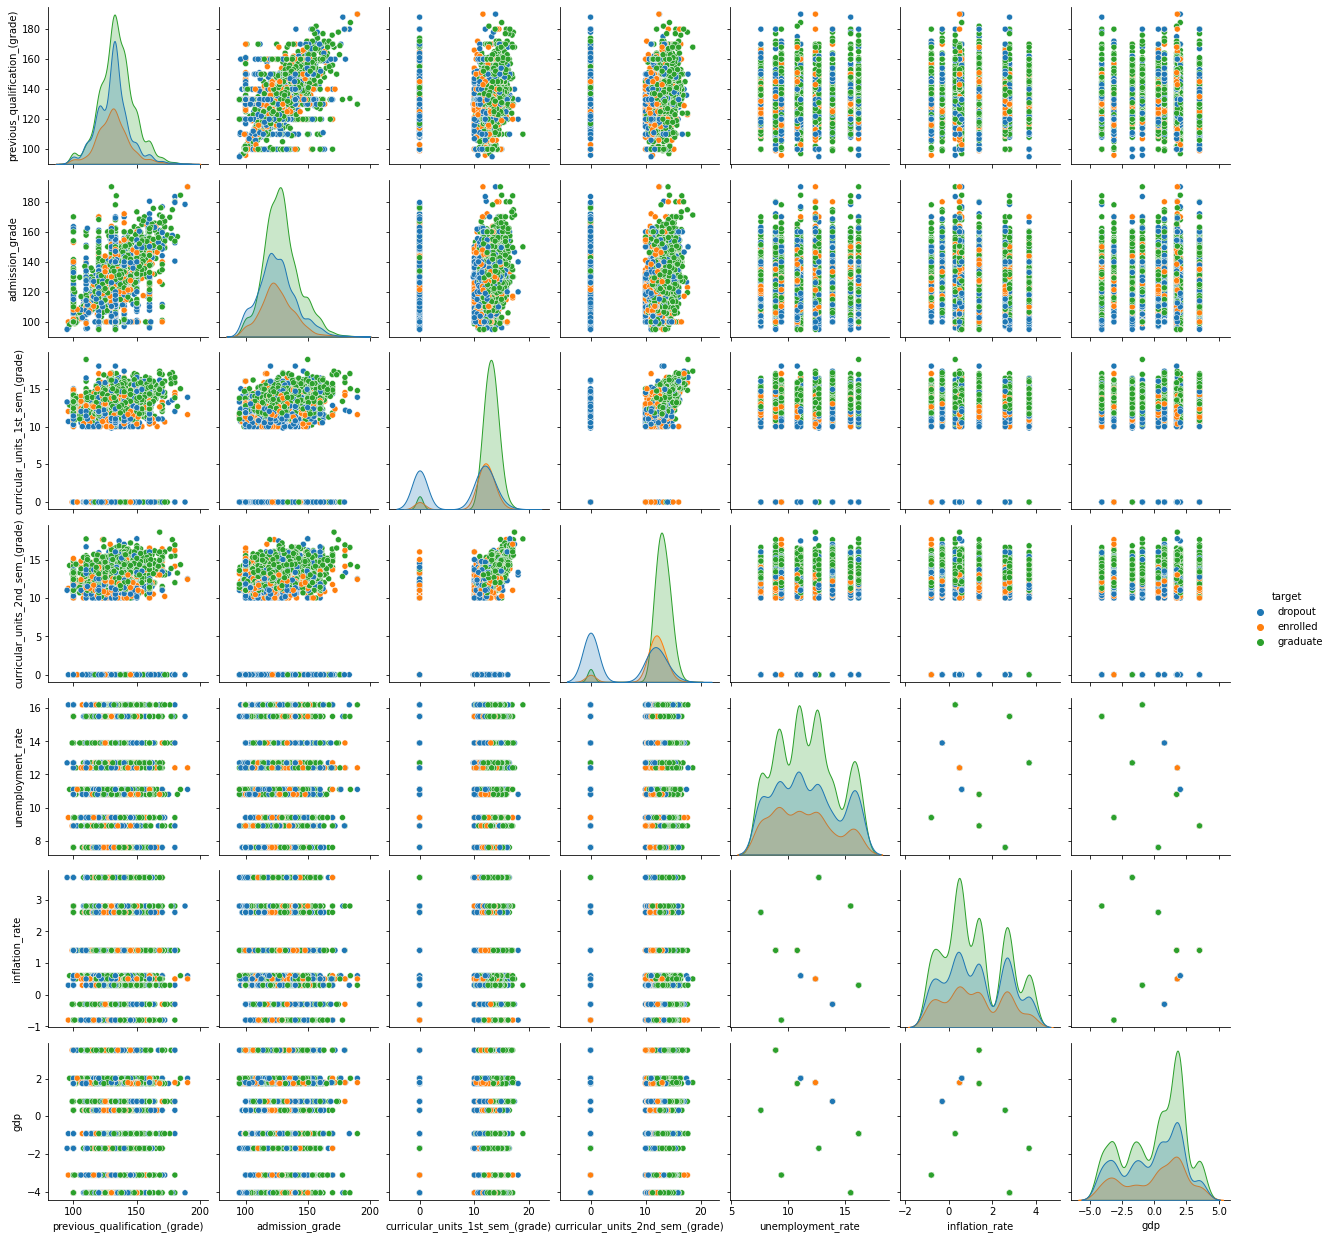

In [27]:
subset = df.select_dtypes(include=['float64'])
subset['target'] = df['target']

sns.pairplot(subset, hue = "target")

**Heatmap**  
Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.
In the context of machine learning, they are used to visualize correlation between variables.

<AxesSubplot:>

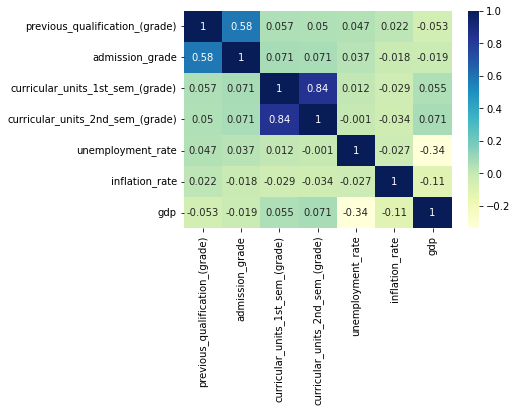

In [28]:
subset = df.select_dtypes(include=['float64'])

sns.heatmap(subset.corr(), annot=True, cmap='YlGnBu')

Through the previous heatmap, we see the correlation between the numeric variables present in our data set.

**Feature importance**

In [29]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

First we will analyze feature importance based on a random forest classifier model. For this we use the `feature_importances_` attribute.

In [30]:
from matplotlib.pyplot import figure
rf_feature_importance = RandomForestClassifier()
rf_feature_importance.fit(X_train, y_train)
print(rf_feature_importance.feature_importances_)
print(X_train)

[0.04091043 0.03802262 0.0203307  0.01658801 0.03195414 0.1098797
 0.00704686 0.01972785 0.03538163 0.05827614 0.00517206 0.1385061
 0.00533628 0.02132502 0.03785313 0.09660471 0.00551651 0.00244803
 0.0123646  0.00758808 0.00115351 0.0302366  0.02237195 0.02475127
 0.01098308 0.02188107 0.00156166 0.00431492 0.02507212 0.02051543
 0.00246895 0.00587974 0.03656875 0.01343091 0.04476305 0.02321437]
[[130.   32.    7.  ...   0.    1.   10.8]
 [154.4  18.    1.  ...   0.    1.   16.2]
 [123.9  21.   17.  ...   0.    1.   10.8]
 ...
 [138.3  20.    1.  ...   0.    1.   13.9]
 [120.2  19.    1.  ...   1.    1.   12.4]
 [113.7  20.   42.  ...   0.    1.   12.7]]


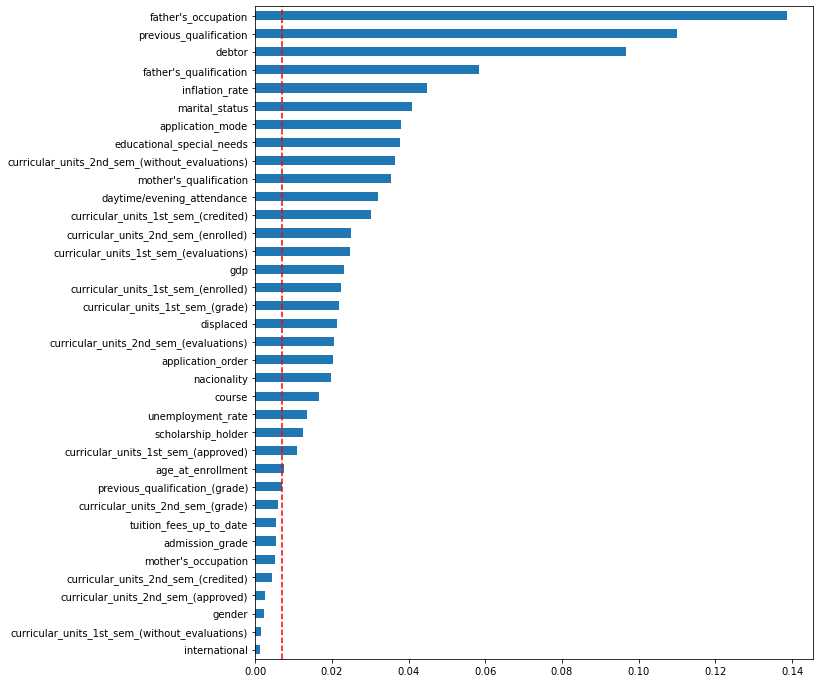

In [31]:
feat_importances = pd.Series(rf_feature_importance.feature_importances_, index=df_train.columns).sort_values(ascending=True)

# Adjust the figure size
plt.figure(figsize=(10, 12))

# Plot the horizontal bar chart
ax = feat_importances.plot(kind='barh')

# Adjust the spacing between the bars
ax.barh(feat_importances.index, feat_importances, height=0.5)

# Add a line to mark the 25% least important features
cutoff = int(0.25 * len(feat_importances))
plt.axvline(x=feat_importances.iloc[cutoff], color='r', linestyle='--')

plt.show()

# Creating a list of features with importance scores below the 25th percentile threshold
least_important_features_rf = feat_importances.index[:cutoff].tolist()

Based on this analysis, the features with the highest importance are father's_occupation, previous_qualification, debtor, father's_qualification.  

The features in the 25% of least importance are curricular_units_2nd_sem_(grade), previous_qualification_(grade), admission_grade, mother's_occupation, tuition_fees_up_to_date, curricular_units_2nd_sem_(credited), gender, curricular_units_2nd_sem_(approved), international and curricular_units_2st_sem_(without_evaluations)

Next we will perform a similar exercise with a decision tree classifier model.

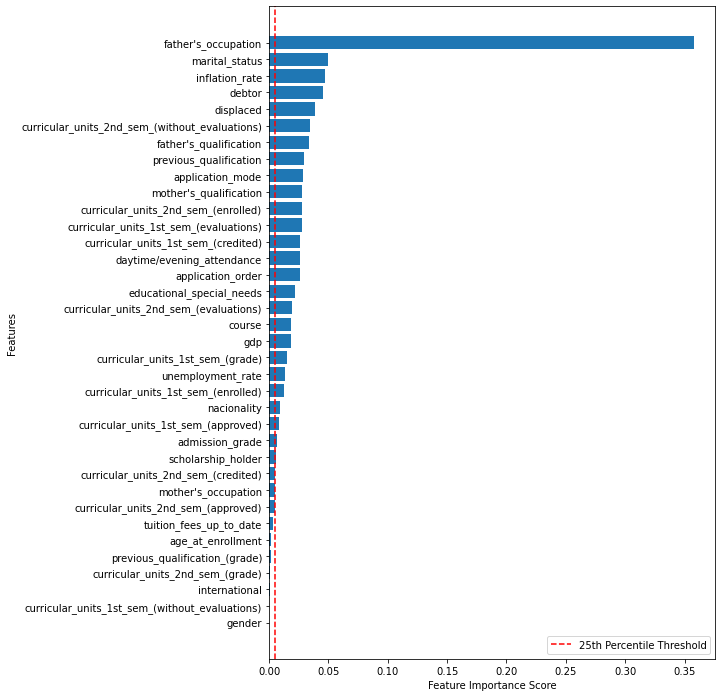

In [32]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dt_feature_importance = DecisionTreeClassifier()

# fit the model
dt_feature_importance.fit(X_train, y_train)
# get importance
importance = dt_feature_importance.feature_importances_

# Sort features based on importance
sorted_indices = np.argsort(importance)
sorted_features = [df_train.columns[i] for i in sorted_indices]

# Calculate the threshold for the 25th percentile
threshold = np.quantile(importance, 0.25)

# Adjust the figure size
plt.figure(figsize=(8, 12))

# plot feature importance with adjusted bar width
plt.barh(sorted_features, importance[sorted_indices], height=0.8)
plt.axvline(x=threshold, color='r', linestyle='--', label='25th Percentile Threshold')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend(loc='lower right')
plt.show()

least_important_features_df = [sorted_features[i] for i in range(len(sorted_features)) if importance[sorted_indices[i]] < threshold]


Based in the DecisionTreeClassifier model, the fields with the highest importance are father's_occupation, marital_status, debtor and inflation_rate, father's_qualification.  

In this case, the features in the 25% of least importance are curricular_units_2nd_sem_(approved), mother's_occupation, curricular_units_2nd_sem_(grade), age_at_enrollment, tuition_fees_up_to_date, previous_qualification_(grade), curricular_units_2st_sem_(without_evaluations), international and gender

Let's focus on the fields of least importance, because they are the ones that can introduce noice to our model, therefore reducing it's accuracy.

In [33]:
least_important_features = pd.DataFrame({'Least Importance (DecisionTreeClassifier)' : least_important_features_df, 
                                         'Least Importance (RandomForestClassifier)' : least_important_features_rf})
least_important_features

,Least Importance (DecisionTreeClassifier),Least Importance (RandomForestClassifier)
0,gender,international
1,curricular_units_1st_sem_(without_evaluations),curricular_units_1st_sem_(without_evaluations)
2,international,gender
3,curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(approved)
4,previous_qualification_(grade),curricular_units_2nd_sem_(credited)
5,age_at_enrollment,mother's_occupation
6,tuition_fees_up_to_date,admission_grade
7,curricular_units_2nd_sem_(approved),tuition_fees_up_to_date
8,mother's_occupation,curricular_units_2nd_sem_(grade)


Let's find out which features are present in both lists of least importance.

In [34]:
intersection = list(set(least_important_features['Least Importance (DecisionTreeClassifier)']).intersection(least_important_features['Least Importance (RandomForestClassifier)']))
intersection

['curricular_units_2nd_sem_(grade)',
 'curricular_units_1st_sem_(without_evaluations)',
 'tuition_fees_up_to_date',
 'curricular_units_2nd_sem_(approved)',
 'gender',
 'international',
 "mother's_occupation"]

The feature importance analysis performed in both models identify the next features as having low importance.
* 'curricular_units_2nd_sem_(grade)'
* 'curricular_units_1st_sem_(without_evaluations)'
* 'tuition_fees_up_to_date'
* 'curricular_units_2nd_sem_(approved)'
* 'gender'
* 'international'
* "mother's_occupation"

These models could be deleted from the model to reduce noise. However, for our specific case, this deletion was tested and it resulted in very low changes in the accuracy of the models trained and in some cases, it even reduced the accuracy. Therefore we will continue with the initial set of features.

## 5. Model Training and Parameter Tuning
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* XGBoost

Before training any ML model we must make sure all categorical variables are converted into binary columns.

**One-hot encoding**  
We perform one-hot encoding through a DictVectorizer instance.  
One hot encoding is one method of converting data to prepare it for a machine learning algorithm. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

**Fields after one-hot encoding**

In [35]:
dv.get_feature_names_out()

array(['admission_grade', 'age_at_enrollment', 'application_mode',
       'application_order', 'course',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)',
       'daytime/evening_attendance', 'debtor', 'displaced',
       'educational_special_needs', "father's_occupation",
       "father's_qualification", 'gdp', 'gender', 'inflation_rate',
       'international', 'marital_status', "mother's_occupation",
       "mother's_qualification", 'nacionality', 'previous_qualificati

**Note on parameter tuning**  
During this project we will use GridSearchCV to accelerate the parameter tuning process.  
GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered.

**LogisticRegression**  
Logistic Regression is a statistical model used for classification tasks. It estimates the probability of a outcome based on one or more predictor variables. The model applies a logistic function to map the input features to the output, providing a probabilistic interpretation of the relationship between the predictors and the response variable.

In [36]:
lr = LogisticRegression()


params = {'penalty': ['l1','l2'],
              'C' : [0, 0.001, 0.005, 0.01, 0.1, 0.5, 1],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'random_state': [47]
              }

grid_search_lr = GridSearchCV(estimator=lr, param_grid=params, n_jobs=-1, cv=5)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0, 0.001, 0.005, 0.01, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2'], 'random_state': [47],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

Save the model for later use

In [33]:
with open('LogisticRegression.bin', 'wb') as f_out:
    pickle.dump((dv, grid_search_lr), f_out)

In [34]:
best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'C': 0.5, 'penalty': 'l2', 'random_state': 47, 'solver': 'newton-cg'}
Best score: 0.7705426190067022


Validation Score

In [93]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = grid_search_lr.predict(X_val)
lr_accutacy_score = accuracy_score(y_val, y_pred)
lr_accutacy_score


0.7457434733257662

In [94]:
lr_confusion_matrix = confusion_matrix(y_val, y_pred)
lr_confusion_matrix

array([[198,  29,  42],
       [ 44,  42,  82],
       [ 11,  16, 417]], dtype=int64)

In [95]:
lr_classification_report = classification_report(y_val, y_pred)
print(lr_classification_report)

              precision    recall  f1-score   support

     dropout       0.78      0.74      0.76       269
    enrolled       0.48      0.25      0.33       168
    graduate       0.77      0.94      0.85       444

    accuracy                           0.75       881
   macro avg       0.68      0.64      0.64       881
weighted avg       0.72      0.75      0.72       881



### DecisionTreeClassifier
The Decision Tree Classifier is a non-linear supervised learning algorithm that is used for classification tasks. It operates by recursively partitioning the dataset into subsets based on the value of different features. This process creates a tree-like model where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label.

In [57]:
dt = DecisionTreeClassifier()


params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,  10, 15, 20, 50, 60, None],
              'min_samples_leaf' : [1, 5, 10, 15, 20, 500, 100, 200],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'random_state': [47]
              }

grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, cv=5)

grid_search_dt.fit(X_train, y_train)

best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'random_state': 47}
Best score: 0.748584378759237


In [63]:
with open('DecisionTreeClassifier.bin', 'wb') as f_out:
    pickle.dump((dv, grid_search_dt), f_out)

Validation Score

In [109]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = grid_search_dt.predict(X_val)
dt_accuracy_score = accuracy_score(y_val, y_pred)
dt_accuracy_score

0.7275822928490352

In [110]:
dt_classification_report = classification_report(y_val, y_pred)
print(dt_classification_report)

              precision    recall  f1-score   support

     dropout       0.80      0.65      0.72       269
    enrolled       0.49      0.26      0.34       168
    graduate       0.74      0.95      0.83       444

    accuracy                           0.73       881
   macro avg       0.68      0.62      0.63       881
weighted avg       0.71      0.73      0.70       881



In [111]:
dt_confusion_matrix = confusion_matrix(y_val, y_pred)
dt_confusion_matrix

array([[176,  32,  61],
       [ 34,  43,  91],
       [  9,  13, 422]], dtype=int64)

Test Score

In [105]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_pred = grid_search_dt.predict(X_test)
accuracy_score(y_test, y_pred)


0.7480136208853575

###  Random Forest  
Random Forest is an ensemble learning method for classification, regression, and other tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes or the mean prediction of the individual trees. Random Forest introduces randomness both in the selection of the data points used to build the trees and the features considered at each split, making it a robust and accurate algorithm

In [60]:
rf = RandomForestClassifier()


params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,  10, 15, 20, 50, 60, None],
              'min_samples_leaf' : [1, 5, 10, 15, 20, 500, 100, 200],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [100, 120, 140, 160, 50, 70, 30], 
              'random_state': [47]
              }

grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=5)

grid_search_rf.fit(X_train, y_train)

best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 160, 'random_state': 47}
Best score: 0.7701695594890301


In [64]:
with open('RandomForestClassifier.bin', 'wb') as f_out:
    pickle.dump((dv, grid_search_rf), f_out)

Validation Score

In [99]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = grid_search_rf.predict(X_val)
rf_accuracy_score = accuracy_score(y_val, y_pred)
rf_accuracy_score

0.7707150964812712

Test Score

In [100]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_pred = grid_search_rf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7673098751418842

In [101]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
rf_confusion_matrix

array([[224,  16,  39],
       [ 34,  50,  80],
       [ 19,  17, 402]], dtype=int64)

In [102]:
rf_classification_report = classification_report(y_test, y_pred)
print(rf_classification_report)

              precision    recall  f1-score   support

     dropout       0.81      0.80      0.81       279
    enrolled       0.60      0.30      0.40       164
    graduate       0.77      0.92      0.84       438

    accuracy                           0.77       881
   macro avg       0.73      0.68      0.68       881
weighted avg       0.75      0.77      0.75       881



**XGBoost**  
XGBClassifier, short for Extreme Gradient Boosting Classifier, is an implementation of the gradient boosting decision tree algorithm designed for speed and performance. It belongs to the family of boosting algorithms and is known for its efficiency in handling large-scale datasets. XGBClassifier iteratively builds a strong predictive model by combining the outputs of multiple weak models, producing accurate results by minimizing errors through successive iterations.

In [72]:
translation_dict = { 'graduate':0, 'dropout':1, 'enrolled':2}
num_y_train = [translation_dict[item] for item in y_train]
num_y_val = [translation_dict[item] for item in y_val]

In [73]:
from xgboost import XGBClassifier

In [74]:
estimator = XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)

In [75]:
parameters = {
    'max_depth': range (2, 18, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [77]:

grid_search_xgb = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = -1,
    cv = 5,
    verbose=True
)

grid_search_xgb.fit(X_train, num_y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 18),
                         'n_estimators': range(60, 220, 40)},
             verbose=True)

In [84]:
with open('XGBClassifier.bin', 'wb') as f_out:
    pickle.dump((dv, grid_search_xgb), f_out)

In [78]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [112]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = grid_search_xgb.predict(X_val)
xgb_accutacy_score = accuracy_score(num_y_val, y_pred)

In [113]:
xgb_classification_report = classification_report(num_y_val, y_pred)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       444
           1       0.81      0.74      0.77       269
           2       0.63      0.36      0.46       168

    accuracy                           0.78       881
   macro avg       0.74      0.68      0.70       881
weighted avg       0.76      0.78      0.76       881



In [83]:
xgb_confusion_matrix = confusion_matrix(num_y_val, y_pred)
xgb_confusion_matrix

array([[424,  13,   7],
       [ 42, 198,  29],
       [ 73,  34,  61]], dtype=int64)

**SVC**  
SVC, or Support Vector Classifier, is a supervised machine learning algorithm that is used for classification tasks. It works by finding the optimal hyperplane that best separates data points of different classes. By mapping data points into a higher-dimensional space, SVC identifies the most suitable decision boundary, maximizing the margin between different classes and thus providing robust classification.

In [88]:
svm = SVC()
parameters = {'C':[0.1, 1, 0.5, 0.05, 10], 
              'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
grid_search_svc = GridSearchCV(svm, parameters, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.5, 0.05, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [91]:
with open('SVC.bin', 'wb') as f_out:
    pickle.dump((dv, grid_search_svc), f_out)

Validation Score

In [144]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = grid_search_svc.predict(X_val)
svc_accurary_score = accuracy_score(y_val, y_pred)

In [145]:
svc_classification_report = classification_report(y_val, y_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

     dropout       0.72      0.68      0.70       269
    enrolled       0.47      0.21      0.29       168
    graduate       0.72      0.89      0.80       444

    accuracy                           0.70       881
   macro avg       0.64      0.60      0.60       881
weighted avg       0.67      0.70      0.67       881



In [146]:
svc_confusion_matrix = confusion_matrix(y_val, y_pred)
svc_confusion_matrix

array([[183,  25,  61],
       [ 39,  36,  93],
       [ 32,  16, 396]], dtype=int64)

## 6. Model Selection

**Accuracy**

Let's take a look at the accurary of each model

In [137]:
dict_accuracy_scores = {
    'model':['LogisticRegression', 
             'DecisionTreeClassifier', 
             'RandomForestClassifier',
             'SVC',
             'XGBClassifier'
            ],
    'accuracy_score' : [lr_accutacy_score,
                        dt_accuracy_score,
                        rf_accuracy_score,
                        svc_accurary_score,
                        xgb_accutacy_score
                        ]
}


columns = {0:'model', 1:'accuracy_score'}

df_accuracy_scores = pd.DataFrame.from_dict(dict_accuracy_scores)
df_accuracy_scores.sort_values('accuracy_score', ascending=False)


,model,accuracy_score
4,XGBClassifier,0.775255
2,RandomForestClassifier,0.770715
0,LogisticRegression,0.745743
1,DecisionTreeClassifier,0.727582
3,SVC,0.698070


The accuracy_score function measures the fraction of correctly classified samples, allowing us to assess the overall performance of each model.  

Based on the accuracy scores for the trained models, both the XGBClassifier and RandomForestClassifier exhibited the best performances. However, it is essential to note that in scenarios involving class imbalance, relying solely on accuracy as a metric for model selection can often be deceptive.

In cases where the dataset is imbalanced, accuracy may not provide a comprehensive representation of a model's performance. Factors such as precision, recall, and the F1 score play crucial roles in understanding the model's behavior, particularly in distinguishing between different classes. Therefore, our decision-making process extends beyond accuracy assessment to include a comprehensive examination of the classification reports and confusion matrices for each model.  

Analyzing the classification reports and confusion matrices allows us to gain deeper insights into the models' abilities to correctly predict both the minority (dropout) and majority classes, ensuring a more robust and nuanced understanding of their performance characteristics.

Now let's delve into the detailed analysis of the classification reports and confusion matrices for each model.

**Classification reports**

In [147]:
print('RandomForestClassifier classification report')
print(xgb_classification_report)
print("----------------------------------------------------------")
print('XGBClassifier classification report')
print(rf_classification_report)
print("----------------------------------------------------------")
print('LogisticRegression classification report')
print(lr_classification_report)
print("----------------------------------------------------------")
print('DecisionTreeClassifier classification report')
print(dt_classification_report)
print("----------------------------------------------------------")
print('SVC classification report')
print(svc_classification_report)

RandomForestClassifier classification report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       444
           1       0.81      0.74      0.77       269
           2       0.63      0.36      0.46       168

    accuracy                           0.78       881
   macro avg       0.74      0.68      0.70       881
weighted avg       0.76      0.78      0.76       881

----------------------------------------------------------
XGBClassifier classification report
              precision    recall  f1-score   support

     dropout       0.81      0.80      0.81       279
    enrolled       0.60      0.30      0.40       164
    graduate       0.77      0.92      0.84       438

    accuracy                           0.77       881
   macro avg       0.73      0.68      0.68       881
weighted avg       0.75      0.77      0.75       881

----------------------------------------------------------
LogisticRegression classification repor

**Confusion Matrix**

In [148]:
print('RandomForestClassifier confusion matrix')
print(xgb_confusion_matrix)
print("----------------------------------------------------------")
print('XGBClassifier confusion matrix')
print(rf_confusion_matrix)
print("----------------------------------------------------------")
print('LogisticRegression confusion matrix')
print(lr_confusion_matrix)
print("----------------------------------------------------------")
print('DecisionTreeClassifier confusion matrix')
print(dt_confusion_matrix)
print("----------------------------------------------------------")
print('SVC confusion matrix')
print(svc_confusion_matrix)

RandomForestClassifier confusion matrix
[[424  13   7]
 [ 42 198  29]
 [ 73  34  61]]
----------------------------------------------------------
XGBClassifier confusion matrix
[[224  16  39]
 [ 34  50  80]
 [ 19  17 402]]
----------------------------------------------------------
LogisticRegression confusion matrix
[[198  29  42]
 [ 44  42  82]
 [ 11  16 417]]
----------------------------------------------------------
DecisionTreeClassifier confusion matrix
[[176  32  61]
 [ 34  43  91]
 [  9  13 422]]
----------------------------------------------------------
SVC confusion matrix
[[183  25  61]
 [ 39  36  93]
 [ 32  16 396]]


Final model decision. Data in the confusion matrices and classification reports confirm that the RandomForestClassifier model is the best performing one between our trained models.  
We will use this model for the rest of the project.

## 7. Deploying the model
* Check `train.py` and `predict_test.py` files

In order to deploy the model into a production environment, we use waitress  
`waitress-serve --listen=0.0.0.0:9696 predict:app`

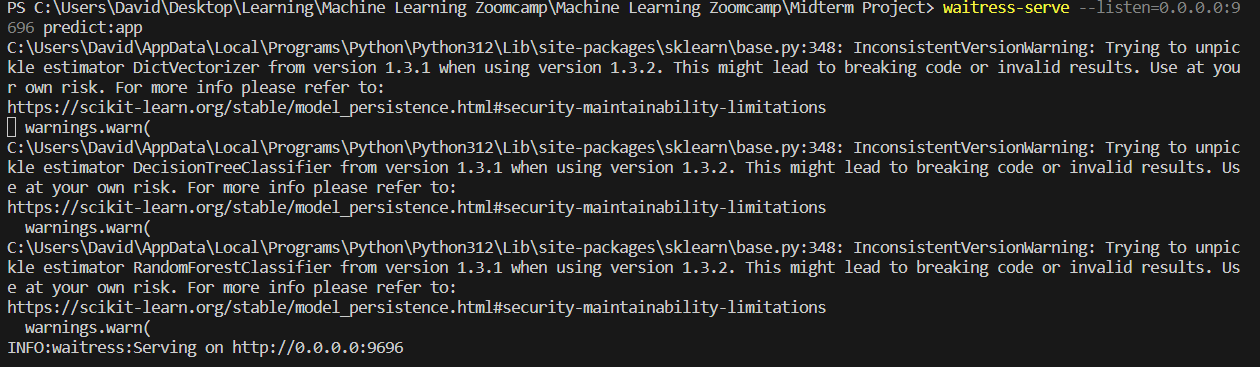

You cna access this through http://localhost:9696/predict.  However, it will show a window that reads 'Method Not Allowed', since we are using a POST method with http.  
This only allows us to confirm that the web service has already been deployed

Run `python predict_test.py` on a python terminar to verify the deployed model is working

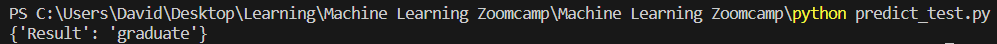

## 8. Dependency and environment manager

We use pipenv to handle a virtual environment for this project.

enter `pipenv install` into python terminal in order to install all dependencies into the virtual environment.  
Alternatively you can use `pipenv install DEPENDENCY` to install specific packages.  

This creates two files in the working directory.
* Pipfile
* Pipfile.lock

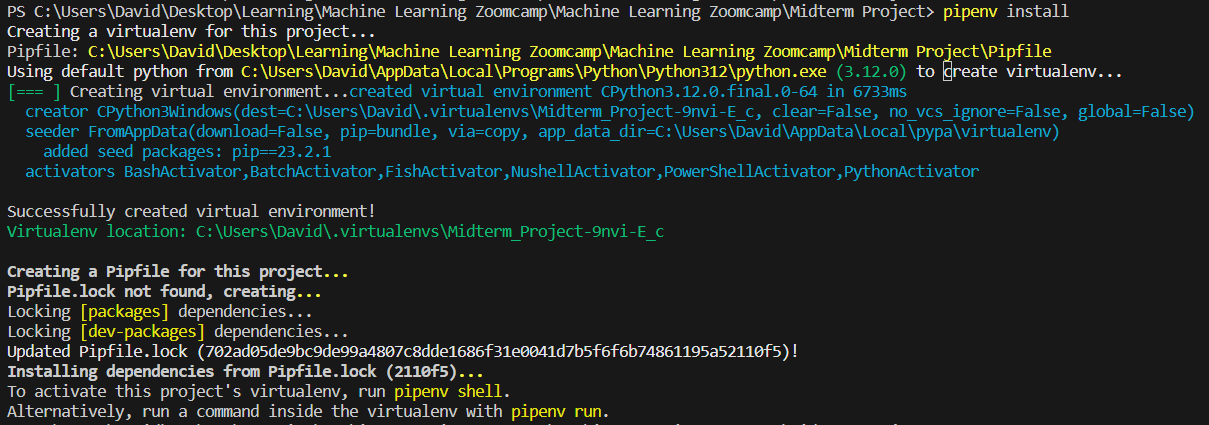

Now we can run `pipenv run waitress-serve --listen=0.0.0.0:9696 predict:app` to run the application inside of a virtual environment

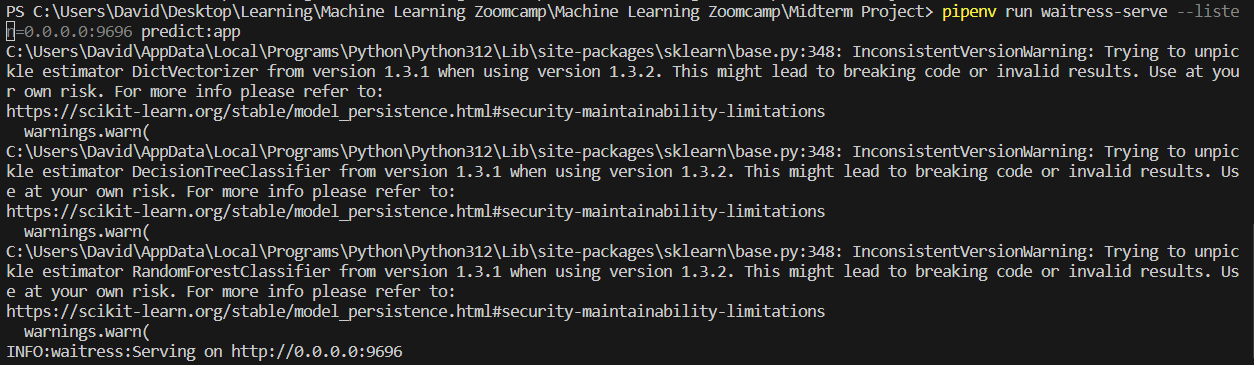

## 9. Containerization
* We'll use docker for containerization. Therefore we create a Dockerfile.
* Docker image used: 3.12-slim

Run un python terminal `docker run -it --rm python:3.12-slim`

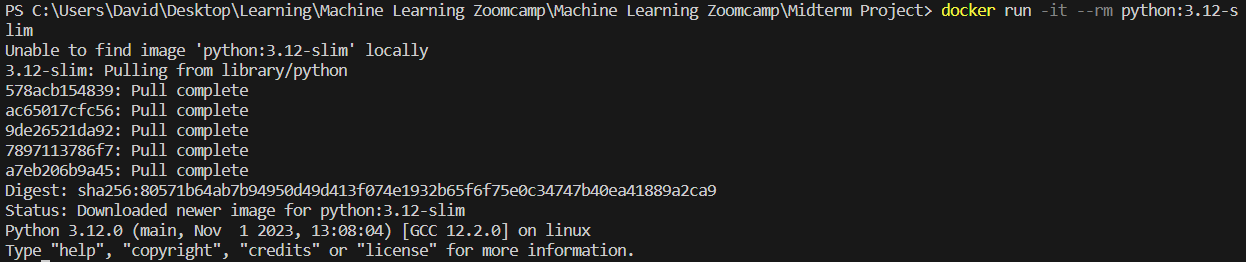

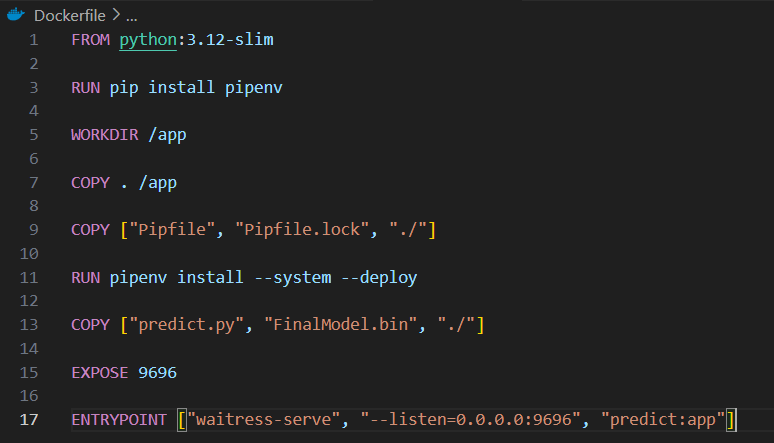

In order to initiate a docker instance based on the Dockerfile in the current directory enter the next line into the terminal.  
`docker build -t midterm-project .`  
We called the docker image midterm-project" 

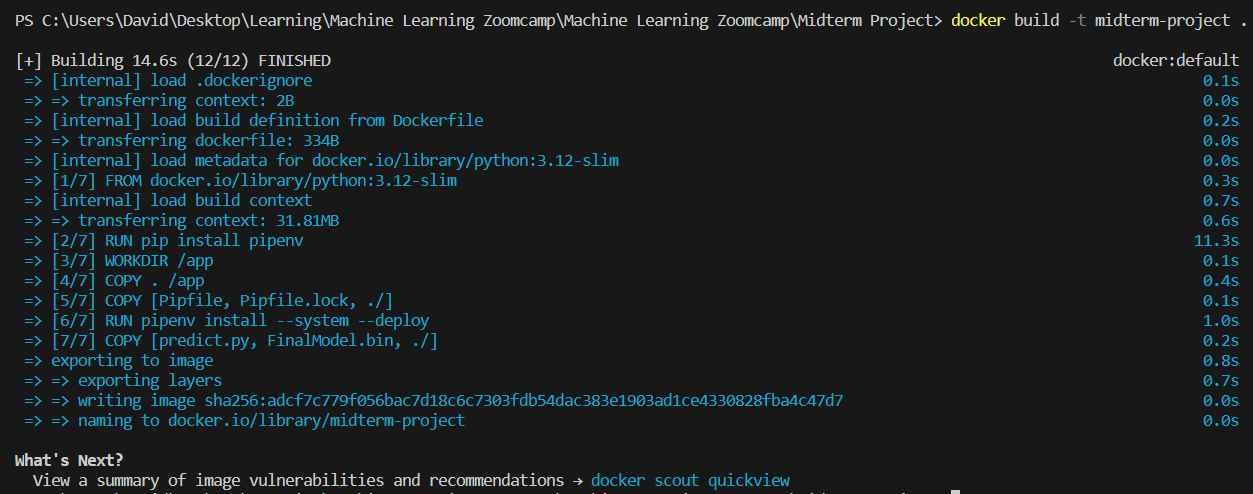

Run `docker run -it --rm -p 9696:9696 midterm-project` in order to run the image we just built. Given we included the predict.py file in the run clause in the Dockerfile, this will put our flask app in localhost.

You can now run predict_test.py to test the deployed app.

**Video Evidence of Deployed Service**  
Video is available through this link  
https://drive.google.com/file/d/1NFhYNiZ5ZrEK09gkqHi0bhJ0vE7Sh4O0/view?usp=drive_link

Otherwise, download the video posted here:
https://github.com/Dmoralesc01/Machine_Learning_Zoomcamp_David_Morales/blob/main/Midterm%20Project%3A%20Student%20Academic%20Success%20Prediction/Video%20%20-%20Web%20Service%20Deployed.mp4